In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
# Generate a dataset with two Gaussian components
mu1, sigma1 = np.array([2, 1]), np.array([[0.5, 0.5], 
                                          [0.5, 2.]])

mu2, sigma2 = np.array([1, 4]), np.array([[2.5, 1.5], 
                                          [1.5, 3.]])
n = 100
X1 = np.random.multivariate_normal(mu1, sigma1, size=n, check_valid='warn', tol=1e-8)
X2 = np.random.multivariate_normal(mu2, sigma2, size=n, check_valid='warn', tol=1e-8)
X = np.concatenate([X1, X2])

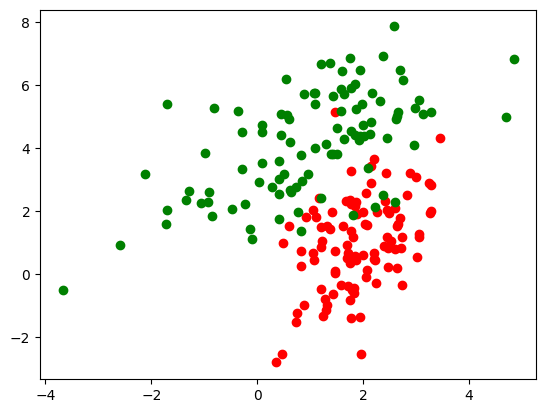

In [36]:
plt.scatter(X1[:, 0], X1[:, 1], color='red')
plt.scatter(X2[:, 0], X2[:, 1], color='green')

In [103]:
# Initialize parameters
# mu1_hat, sigma1_hat = np.mean(X1, axis=0), np.cov(X1.T)
# mu2_hat, sigma2_hat = np.mean(X2, axis=0), np.cov(X2.T)
mu1_hat, sigma1_hat = X[0], np.identity(2)
mu2_hat, sigma2_hat = X[1], np.identity(2)
pi1_hat, pi2_hat = 0.5, 0.5

In [104]:
mu1_hat.shape, sigma1_hat.shape

((2,), (2, 2))

In [105]:
p1 = multivariate_normal.pdf(X, mu1_hat, sigma1_hat)
p2 = multivariate_normal.pdf(X1, mu1_hat, sigma1_hat)
p3 = multivariate_normal.pdf(X2, mu1_hat, sigma1_hat)

In [106]:
p1.mean(), p2.mean(), p3.mean()

(0.029316871277274482, 0.04970575821360884, 0.008927984340940132)

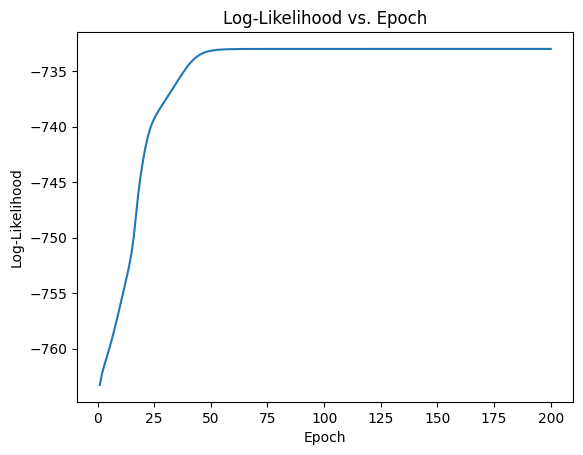

In [110]:
# Perform EM algorithm for 20 epochs
num_epochs = 200
log_likelihoods = []

for epoch in range(num_epochs):
	# E-step: Compute responsibilities
	gamma1 = pi1_hat * multivariate_normal.pdf(X, mu1_hat, sigma1_hat)
	gamma2 = pi2_hat * multivariate_normal.pdf(X, mu2_hat, sigma2_hat)
	total = gamma1 + gamma2
	gamma1 /= total
	gamma2 /= total
	
	# M-step: Update parameters
	mu1_hat = np.linalg.multi_dot([gamma1, X]) / gamma1.sum()
	mu2_hat = np.linalg.multi_dot([gamma2, X]) / gamma2.sum()
	sigma1_hat = np.cov((X - mu1_hat).T, aweights=gamma1)
	sigma2_hat = np.cov((X - mu2_hat).T, aweights=gamma2)
	pi1_hat = np.mean(gamma1)
	pi2_hat = np.mean(gamma2)
	
	# Compute log-likelihood
	log_likelihood = np.sum(np.log(pi1_hat * multivariate_normal.pdf(X, mu1_hat, sigma1_hat)
								+ pi2_hat * multivariate_normal.pdf(X, mu2_hat, sigma2_hat)))
	log_likelihoods.append(log_likelihood)

# Plot log-likelihood values over epochs
plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()

In [112]:
p1 = multivariate_normal.pdf(X, mu1_hat, sigma1_hat)
p2 = multivariate_normal.pdf(X1, mu1_hat, sigma1_hat)
p3 = multivariate_normal.pdf(X2, mu1_hat, sigma1_hat)
p1.mean(), p2.mean(), p3.mean()

(0.023234901747648962, 0.006212762091955089, 0.04025704140334283)

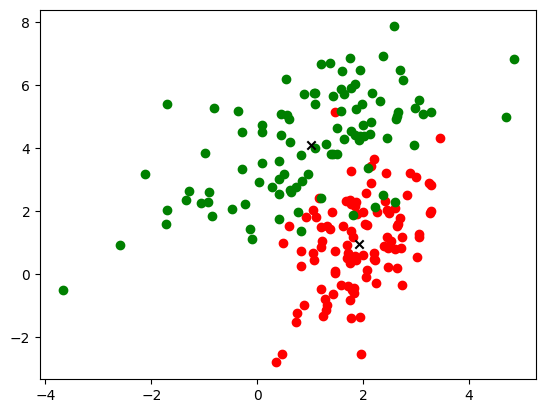

In [114]:
plt.scatter(X1[:, 0], X1[:, 1], color='red')
plt.scatter(X2[:, 0], X2[:, 1], color='green')
plt.scatter(mu1_hat[0], mu1_hat[1], color='black', marker='x')
plt.scatter(mu2_hat[0], mu2_hat[1], color='black', marker='x')